In [2]:
import pandas as pd

aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products__prior = pd.read_csv("order_products__prior.csv")
order_products__train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

print("Aisles:", aisles.shape)
print("Departments:", departments.shape)
print("Order Products (Prior):", order_products__prior.shape)
print("Order Products (Train):", order_products__train.shape)
print("Orders:", orders.shape)
print("Products:", products.shape)


Aisles: (134, 2)
Departments: (21, 2)
Order Products (Prior): (32434489, 4)
Order Products (Train): (1384617, 4)
Orders: (3421083, 7)
Products: (49688, 4)


In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [5]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [6]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [7]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [8]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [9]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [10]:
orders.dtypes


order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [11]:
orders.dropna(subset = ['days_since_prior_order'],inplace = True)

In [12]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [13]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [14]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [15]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [16]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
orders['eval_set_encoded'] = le.fit_transform(orders['eval_set'])


In [18]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
eval_set_encoded            int32
dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

orders['eval_set_encoded'] = le.fit_transform(orders['eval_set'])

print("Classes found by LabelEncoder:", le.classes_)
print("Encoded 'eval_set' values:\n", orders[['eval_set', 'eval_set_encoded']].head())


Classes found by LabelEncoder: ['prior' 'test' 'train']
Encoded 'eval_set' values:
   eval_set  eval_set_encoded
1    prior                 0
2    prior                 0
3    prior                 0
4    prior                 0
5    prior                 0


In [20]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
eval_set_encoded            int32
dtype: object

In [21]:
orders['eval_set'] = le.fit_transform(orders['eval_set'])

In [22]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                    int32
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
eval_set_encoded            int32
dtype: object

In [23]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
eval_set_encoded          0
dtype: int64

In [24]:
orders.dropna(subset = ['days_since_prior_order'],inplace = True)

In [25]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
eval_set_encoded          0
dtype: int64

In [26]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                    int32
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
eval_set_encoded            int32
dtype: object

In [27]:
orders['days_since_prior_order']= orders['days_since_prior_order'].astype('int')

In [28]:
orders.dtypes

order_id                  int64
user_id                   int64
eval_set                  int32
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    int32
eval_set_encoded          int32
dtype: object

In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_encoded
1,2398795,1,0,2,3,7,15,0
2,473747,1,0,3,3,12,21,0
3,2254736,1,0,4,4,7,29,0
4,431534,1,0,5,4,15,28,0
5,3367565,1,0,6,2,7,19,0


In [30]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [31]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [32]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [33]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [35]:
aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [36]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [37]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [38]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [39]:
order_products__prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [40]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [41]:
order_products__train.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [42]:
duplicates = order_products__train.duplicated

In [43]:
order_products__train[duplicates]

,order_id,product_id,add_to_cart_order,reordered


In [44]:
duplicates = order_products__prior.duplicated(keep=False)
duplicate_rows = order_products__prior[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [45]:
duplicates = orders.duplicated(keep=False)
duplicate_rows = orders[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order, eval_set_encoded]
Index: []


In [46]:

duplicates = products.duplicated(keep=False)
duplicate_rows = products[duplicates]
print(duplicate_rows)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [47]:
duplicates = departments.duplicated(keep=False)
duplicate_rows = departments[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [49]:
duplicates = aisles.duplicated(keep=False)
duplicate_rows = aisles[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [50]:
duplicates = order_products__train.duplicated(keep=False)
duplicate_rows = order_products__train[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [51]:
duplicates = order_products__prior.duplicated(keep=False)
duplicate_rows = order_products__prior[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [52]:
prior_merged = pd.merge(order_products__prior, products, on='product_id', how='left')

In [53]:
prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [54]:
prior_merged = prior_merged.merge(aisles, on='aisle_id', how='left')

In [55]:
prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [56]:
prior_merged = prior_merged.merge(departments, on='department_id', how='left')

In [57]:
prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [58]:
full_data = pd.merge(prior_merged, orders, on='order_id', how='left')

In [59]:
full_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_encoded
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0


In [60]:
full_data.shape
full_data.info()
full_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 float64
 10  eval_set                float64
 11  order_number            float64
 12  order_dow               float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
 15  eval_set_encoded        float64
dtypes: float64(7), int64(6), object(3)
memory usage: 3.9+ GB


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,eval_set_encoded
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279.0,0.0,3.0,5.0,9.0,8.0,0.0


In [61]:
full_data.isnull().sum()


order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
user_id                   2078068
eval_set                  2078068
order_number              2078068
order_dow                 2078068
order_hour_of_day         2078068
days_since_prior_order    2078068
eval_set_encoded          2078068
dtype: int64

In [62]:
full_data.duplicated().sum()


0

In [63]:
full_data = full_data.drop(columns=['eval_set_encoded'])


In [64]:
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 float64
 10  eval_set                float64
 11  order_number            float64
 12  order_dow               float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
dtypes: float64(6), int64(6), object(3)
memory usage: 3.6+ GB


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279.0,0.0,3.0,5.0,9.0,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279.0,0.0,3.0,5.0,9.0,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279.0,0.0,3.0,5.0,9.0,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279.0,0.0,3.0,5.0,9.0,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279.0,0.0,3.0,5.0,9.0,8.0


In [65]:

null_rows = full_data[full_data.isnull().any(axis=1)]
null_rows.head()  


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
175,20,35430,1,0,Nilla Wafers,61,19,cookies cakes,snacks,NaN,NaN,NaN,NaN,NaN,NaN
176,20,47485,2,0,Mini Chocolate Chip Waffles,52,1,frozen breakfast,frozen,NaN,NaN,NaN,NaN,NaN,NaN
177,20,7419,3,0,Sweet Red Grape Tomatoes,83,4,fresh vegetables,produce,NaN,NaN,NaN,NaN,NaN,NaN
178,20,5112,4,0,Danimals Swingin' Strawberry Banana Smoothie,120,16,yogurt,dairy eggs,NaN,NaN,NaN,NaN,NaN,NaN
179,20,33452,5,0,Fruit Punch Sports Drink,64,7,energy sports drinks,beverages,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
full_data = full_data.dropna()

In [67]:
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30356421 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 float64
 10  eval_set                float64
 11  order_number            float64
 12  order_dow               float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
dtypes: float64(6), int64(6), object(3)
memory usage: 3.6+ GB


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279.0,0.0,3.0,5.0,9.0,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279.0,0.0,3.0,5.0,9.0,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279.0,0.0,3.0,5.0,9.0,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279.0,0.0,3.0,5.0,9.0,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279.0,0.0,3.0,5.0,9.0,8.0


In [68]:
full_data.info()
full_data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 30356421 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 float64
 10  eval_set                float64
 11  order_number            float64
 12  order_dow               float64
 13  order_hour_of_day       float64
 14  days_since_prior_order  float64
dtypes: float64(6), int64(6), object(3)
memory usage: 3.6+ GB


,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.035642e+07,3.035642e+07,3.035642e+07,3.035642e+07,3.035642e+07,3.035642e+07,3.035642e+07,30356421.0,3.035642e+07,3.035642e+07,3.035642e+07,3.035642e+07
mean,1.710737e+06,2.557423e+04,8.354149e+00,6.300656e-01,7.120991e+01,9.924141e+00,1.029340e+05,0.0,1.824706e+01,2.740782e+00,1.341125e+01,1.110407e+01
std,9.872461e+05,1.409455e+04,7.133539e+00,4.827867e-01,3.820574e+01,6.281639e+00,5.946888e+04,0.0,1.759170e+01,2.087924e+00,4.246819e+00,8.778914e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.561350e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.140900e+04,0.0,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710892e+06,2.523400e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.025960e+05,0.0,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565520e+06,3.793300e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543850e+05,0.0,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,0.0,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


In [69]:
full_data.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
department                 object
user_id                   float64
eval_set                  float64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
dtype: object

In [70]:
full_data.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [71]:
cols_to_convert = ['user_id', 'order_number', 'order_dow', 'order_hour_of_day' , 'days_since_prior_order']
for col in cols_to_convert:
    full_data[col] = full_data[col].astype(int) 


In [72]:
full_data.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
aisle                      object
department                 object
user_id                     int32
eval_set                  float64
order_number                int32
order_dow                   int32
order_hour_of_day           int32
days_since_prior_order      int32
dtype: object

In [73]:
full_data['eval_set'] = full_data['eval_set'].astype('category')


In [74]:
full_data.dtypes

order_id                     int64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
aisle                       object
department                  object
user_id                      int32
eval_set                  category
order_number                 int32
order_dow                    int32
order_hour_of_day            int32
days_since_prior_order       int32
dtype: object

In [75]:
cat_cols = ['product_name', 'aisle', 'department']
for col in cat_cols:
    full_data[col] = full_data[col].astype('category')


In [76]:
full_data.dtypes

order_id                     int64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name              category
aisle_id                     int64
department_id                int64
aisle                     category
department                category
user_id                      int32
eval_set                  category
order_number                 int32
order_dow                    int32
order_hour_of_day            int32
days_since_prior_order       int32
dtype: object

In [78]:
full_data.dtypes

order_id                     int64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name              category
aisle_id                     int64
department_id                int64
aisle                     category
department                category
user_id                      int32
eval_set                  category
order_number                 int32
order_dow                    int32
order_hour_of_day            int32
days_since_prior_order       int32
dtype: object

In [79]:
full_data.info()
full_data.describe()
full_data['order_number'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 30356421 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   product_id              int64   
 2   add_to_cart_order       int64   
 3   reordered               int64   
 4   product_name            category
 5   aisle_id                int64   
 6   department_id           int64   
 7   aisle                   category
 8   department              category
 9   user_id                 int32   
 10  eval_set                category
 11  order_number            int32   
 12  order_dow               int32   
 13  order_hour_of_day       int32   
 14  days_since_prior_order  int32   
dtypes: category(4), int32(5), int64(6)
memory usage: 2.4 GB


order_number
3     2050731
2     2048332
4     1820298
5     1628411
6     1472238
       ...   
95      14528
96      13746
97      13367
98      12858
99      12436
Name: count, Length: 98, dtype: int64

In [80]:
full_data['product_name'].value_counts().head(10)


product_name
Banana                    443031
Bag of Organic Bananas    360292
Organic Strawberries      248219
Organic Baby Spinach      226973
Organic Hass Avocado      202478
Organic Avocado           161628
Large Lemon               144297
Strawberries              134291
Limes                     132029
Organic Whole Milk        130682
Name: count, dtype: int64

In [81]:
full_data['user_id'].value_counts().head(10)

user_id
201268    3636
129928    3580
164055    3032
137629    2890
176478    2875
182401    2866
186704    2862
33731     2850
108187    2729
4694      2725
Name: count, dtype: int64

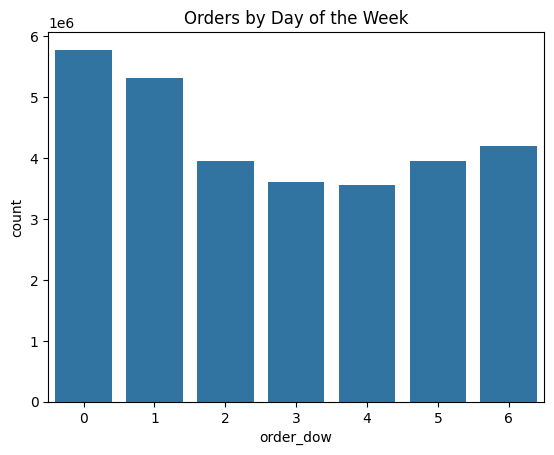

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=full_data, x='order_dow')
plt.title("Orders by Day of the Week")
plt.show()


In [83]:
reordered_products = full_data.groupby('product_name')['reordered'].sum().sort_values(ascending=False).head(10)
print(reordered_products)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_39512\1444144617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reordered_products = full_data.groupby('product_name')['reordered'].sum().sort_values(ascending=False).head(10)


product_name
Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: reordered, dtype: int64


In [112]:
print(full_data.columns.tolist())


['order_id', 'product_id', 'Cart Position', 'Reordered (0 or 1)', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department', 'user_id', 'eval_set', 'order_number', 'Day of Week', 'Hour of Day', 'days_since_prior_order']


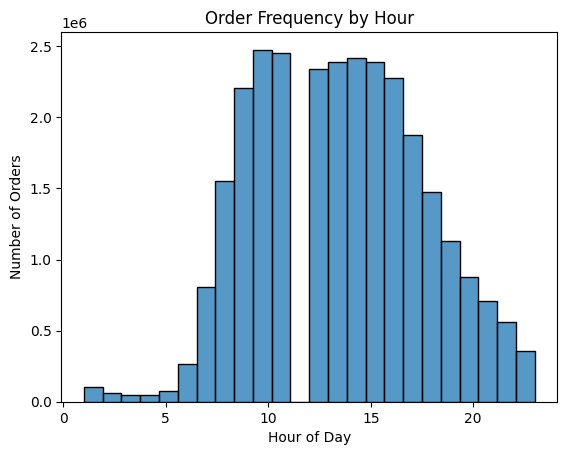

In [113]:
sns.histplot(full_data['Hour of Day'], bins=24, kde=False)
plt.title("Order Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()


In [114]:
top_departments = full_data['department'].value_counts().head(5)
print(top_departments)

top_aisles = full_data['aisle'].value_counts().head(5)
print(top_aisles)


department
produce       8533118
dairy eggs    4890120
snacks        2542270
beverages     2429256
frozen        1960914
Name: count, dtype: int64
aisle
fresh fruits                  3314501
fresh vegetables              3050114
packaged vegetables fruits    1582225
yogurt                        1307961
packaged cheese                868552
Name: count, dtype: int64


In [116]:
reorder_rate = full_data.groupby('department')['Reordered (0 or 1)'].mean().sort_values(ascending=False)
print(reorder_rate)


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_39512\4139490453.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_rate = full_data.groupby('department')['Reordered (0 or 1)'].mean().sort_values(ascending=False)


department
dairy eggs         0.719783
beverages          0.703241
produce            0.697695
bakery             0.677616
deli               0.658000
pets               0.652039
babies             0.625377
alcohol            0.624759
snacks             0.621418
bulk               0.616437
meat seafood       0.613794
breakfast          0.608461
frozen             0.591887
dry goods pasta    0.501756
canned goods       0.496818
other              0.442861
household          0.435507
missing            0.418686
international      0.402585
pantry             0.376092
personal care      0.348851
Name: Reordered (0 or 1), dtype: float64


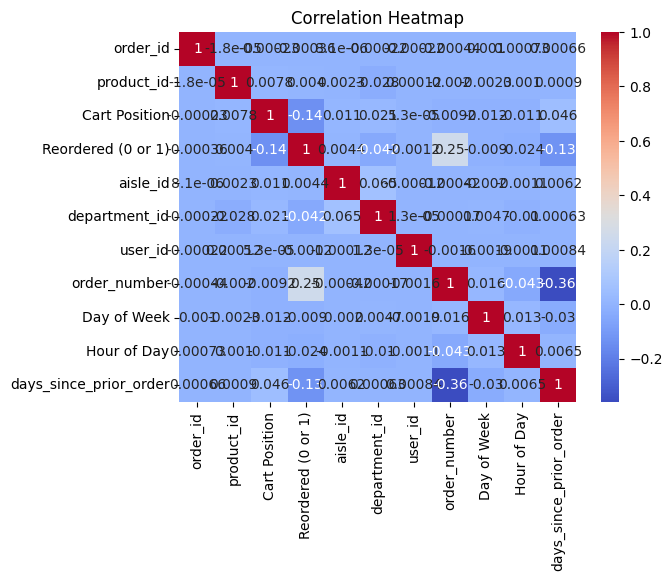

In [117]:
import seaborn as sns
corr = full_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [118]:
full_data['days_since_prior_order'].describe()



count    2.888792e+07
mean     1.104098e+01
std      8.777249e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

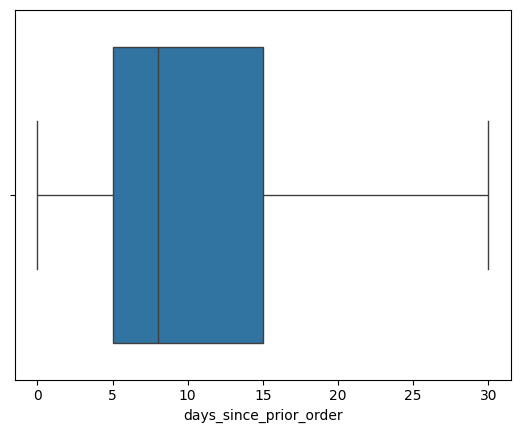

In [119]:
sns.boxplot(x=full_data['days_since_prior_order'])
plt.show()

In [120]:
Q1 = full_data['days_since_prior_order'].quantile(0.25)
Q3 = full_data['days_since_prior_order'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_data = full_data[~((full_data['days_since_prior_order'] < (Q1 - 1.5 * IQR)) | 
                            (full_data['days_since_prior_order'] > (Q3 + 1.5 * IQR)))]


In [123]:
Q1 = full_data['Hour of Day'].quantile(0.25)
Q3 = full_data['Hour of Day'].quantile(0.75)
IQR = Q3 - Q1

full_data = full_data[
    (full_data['Hour of Day'] >= Q1 - 1.5 * IQR) &
    (full_data['Hour of Day'] <= Q3 + 1.5 * IQR)
]


In [127]:
Q1 = full_data['Cart Position'].quantile(0.25)
Q3 = full_data['Cart Position'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
full_data = full_data[
    (full_data['Cart Position'] >= Q1 - 1.5 * IQR) &
    (full_data['Cart Position'] <= Q3 + 1.5 * IQR)
]


In [128]:
full_data.shape
full_data.describe()


,order_id,product_id,Cart Position,Reordered (0 or 1),aisle_id,department_id,user_id,order_number,Day of Week,Hour of Day,days_since_prior_order
count,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07,2.888792e+07
mean,1.710731e+06,2.557319e+04,7.399473e+00,6.372464e-01,7.119480e+01,9.898761e+00,1.029138e+05,1.824922e+01,2.740553e+00,1.351086e+01,1.104098e+01
std,9.873537e+05,1.408986e+04,5.411567e+00,4.807946e-01,3.820080e+01,6.277379e+00,5.947586e+04,1.762420e+01,2.085622e+00,4.109092e+00,8.777249e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.558350e+05,1.351700e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.136600e+04,6.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710989e+06,2.519900e+04,6.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,1.025560e+05,1.200000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565649e+06,3.790800e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543720e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,2.300000e+01,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


In [129]:
Q1 = full_data['Cart Position'].quantile(0.25)
Q3 = full_data['Cart Position'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show outliers only
outliers = full_data[
    (full_data['Cart Position'] < lower_bound) | 
    (full_data['Cart Position'] > upper_bound)
]

outliers.head()


,order_id,product_id,Cart Position,Reordered (0 or 1),product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,Day of Week,Hour of Day,days_since_prior_order


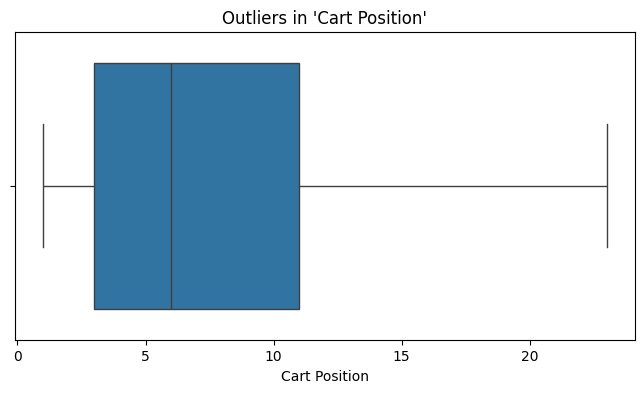

In [126]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=full_data['Cart Position'])
plt.title("Outliers in 'Cart Position'")
plt.show()


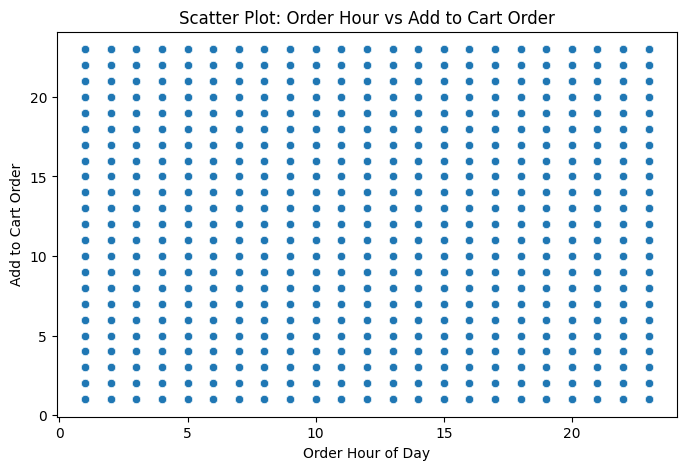

In [130]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=full_data['Hour of Day'], y=full_data['Cart Position'])
plt.title('Scatter Plot: Order Hour vs Add to Cart Order')
plt.xlabel('Order Hour of Day')
plt.ylabel('Add to Cart Order')
plt.show()


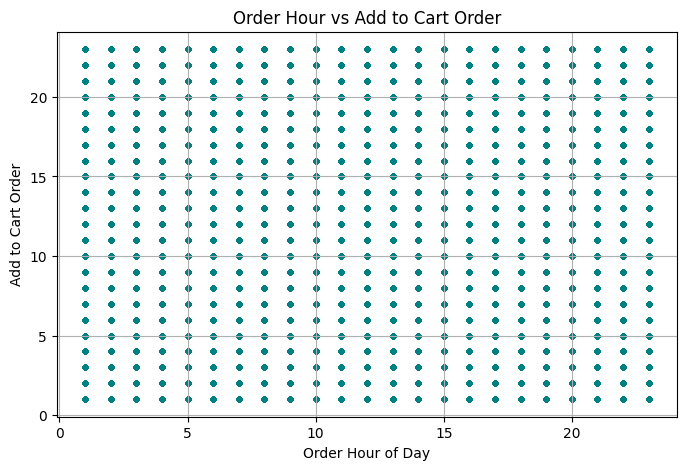

In [131]:
import matplotlib.pyplot as plt

x = full_data['Hour of Day']
y = full_data['Cart Position']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='teal')  # alpha for transparency, s for size
plt.title('Order Hour vs Add to Cart Order')
plt.xlabel('Order Hour of Day')
plt.ylabel('Add to Cart Order')
plt.grid(True)
plt.show()


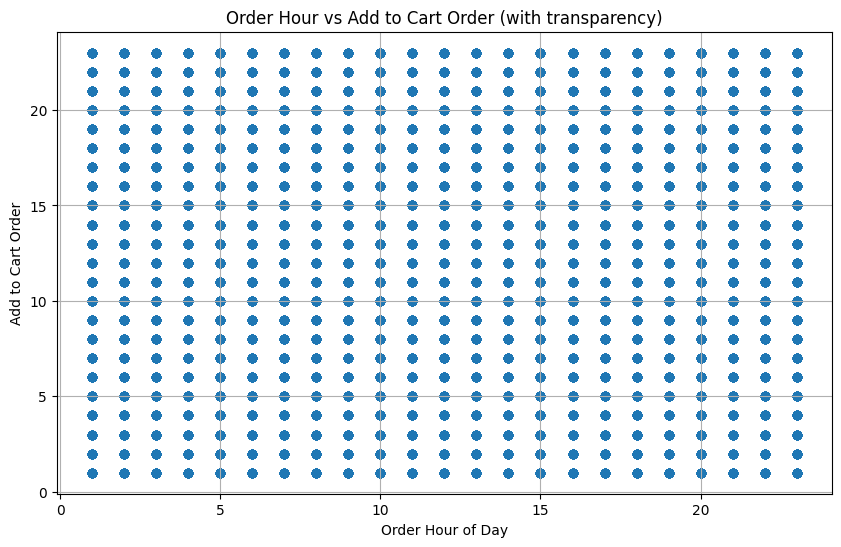

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(full_data['Hour of Day'], full_data['Cart Position'], alpha=0.1)
plt.title('Order Hour vs Add to Cart Order (with transparency)')
plt.xlabel('Order Hour of Day')
plt.ylabel('Add to Cart Order')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=full_data['Cart Position'])
plt.title('Boxplot of Add to Cart Order')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(full_data['Hour of Day'], vert=False)
plt.title('Boxplot of Order Hour of Day')
plt.xlabel('order_hour_of_day')
plt.show()


In [ ]:
full_data['days_since_prior_order'].describe()


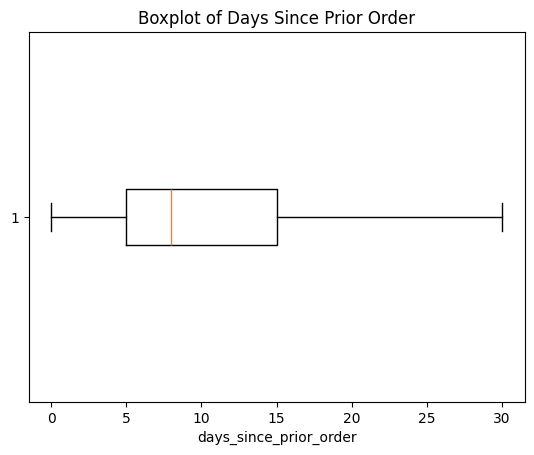

In [133]:
plt.boxplot(full_data['days_since_prior_order'].dropna(), vert=False)
plt.title('Boxplot of Days Since Prior Order')
plt.xlabel('days_since_prior_order')
plt.show()

In [134]:
full_data['days_since_prior_order'].value_counts().sort_index()


days_since_prior_order
0      432444
1      920821
2     1432620
3     1825146
4     2006882
5     2036665
6     2393889
7     3286525
8     1825045
9     1153057
10     915031
11     774303
12     730913
13     802605
14     971381
15     633476
16     435529
17     361106
18     330112
19     315623
20     358251
21     420564
22     291572
23     213074
24     182386
25     169960
26     167671
27     193391
28     239303
29     165620
30    2902954
Name: count, dtype: int64

In [135]:
full_data.dtypes


order_id                     int64
product_id                   int64
Cart Position                int64
Reordered (0 or 1)           int64
product_name              category
aisle_id                     int64
department_id                int64
aisle                     category
department                category
user_id                      int32
eval_set                  category
order_number                 int32
Day of Week                  int32
Hour of Day                  int32
days_since_prior_order       int32
dtype: object

In [136]:
# Renaming columns
full_data.rename(columns={
    'order_dow': 'Day of Week',         
    'order_hour_of_day': 'Hour of Day',  
    'add_to_cart_order': 'Cart Position',
    'reordered': 'Reordered (0 or 1)',   
}, inplace=True)


In [137]:
full_data.head()

,order_id,product_id,Cart Position,Reordered (0 or 1),product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,Day of Week,Hour of Day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,0.0,3,5,9,8
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,0.0,3,5,9,8
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,0.0,3,5,9,8
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,0.0,3,5,9,8
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,0.0,3,5,9,8


In [146]:

# Load only the first 50,000 rows
cleaned_data_subset = pd.read_csv('cleaned_full_data.csv', nrows=50000)

# Export to a new CSV file
cleaned_data_subset.to_csv('subset_50000_cleaned_data.csv', index=False)


In [148]:

trimmed_data = pd.read_csv('trimmed_data.csv')
print(trimmed_data.info())     # Shows column types and non-null counts
print(trimmed_data.head())     # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                50000 non-null  int64  
 1   product_id              50000 non-null  int64  
 2   add_to_cart_order       50000 non-null  int64  
 3   reordered               50000 non-null  int64  
 4   product_name            50000 non-null  object 
 5   aisle_id                50000 non-null  int64  
 6   department_id           50000 non-null  int64  
 7   aisle                   50000 non-null  object 
 8   department              50000 non-null  object 
 9   user_id                 50000 non-null  int64  
 10  eval_set                50000 non-null  float64
 11  order_number            50000 non-null  int64  
 12  order_dow               50000 non-null  int64  
 13  order_hour_of_day       50000 non-null  int64  
 14  days_since_prior_order  50000 non-null

In [149]:
trimmed_data.to_json('trimmed_data.json', orient='records', lines=True)